This is copied from Copy3_CNN_recreation

In [1]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data.dataset import Dataset
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import time
from numpy import random
import sys, os

# RMSE Scores

In [ ]:
def obtain_cosmo_params_rmse(test_data, prediction_data, title):
    scores={}
    maxmin={}
    om_score =np.sqrt(metrics.mean_squared_error(test_data[:,0],prediction_data[:,0]))
    #ob_score =np.sqrt(metrics.mean_squared_error(test_data[:,1],prediction_data[:,1]))
    #h_score =np.sqrt(metrics.mean_squared_error(test_data[:,2],prediction_data[:,2]))
    #ns_score =np.sqrt(metrics.mean_squared_error(test_data[:,3],prediction_data[:,3]))
    s8_score =np.sqrt(metrics.mean_squared_error(test_data[:,1],prediction_data[:,1]))
    scores.update([('omega m rmse', om_score)])
    #scores.update([('omega b rmse', ob_score)])
    #scores.update([('h rmse', h_score)])
    #scores.update([('Ns rmse', ns_score)])
    scores.update([('sigma 8 rmse', s8_score)])
    np.save(title, scores)
    
    maxmin.update([(('omega m min', np.min(prediction_data[:,0])), ('omega m max', np.max(prediction_data[:,0])))])
    maxmin.update([(('omega m min true', np.min(test_data[:,0])), ('omega m max true', np.max(test_data[:,0])))])
    #maxmin.update([(('omega b min', np.min(prediction_data[:,1])), ('omega b max', np.max(prediction_data[:,1])))])
    #maxmin.update([(('h min', np.min(prediction_data[:,2])), ('h max', np.max(prediction_data[:,2])))])
    #maxmin.update([(('Ns min', np.min(prediction_data[:,3])), ('Ns max', np.max(prediction_data[:,3])))])
    maxmin.update([(('sigma 8 min', np.min(prediction_data[:,1])), ('sigma 8 max', np.max(prediction_data[:,1])))])
    maxmin.update([(('sigma 8 min true', np.min(test_data[:,1])), ('sigma 8 max true', np.max(test_data[:,1])))])
    
    return scores, maxmin

In [2]:
results_ = np.loadtxt('predictions/results_df_1rot_4CNN_3fcl_unnorm_9_28.txt')

In [3]:
results_.shape

(100, 4)

In [4]:
true_values= results_[:,[0,1]]
pred_values = results_[:, [2,3]]

In [ ]:
true_values

In [ ]:
pred_values

In [ ]:
obtain_cosmo_params_rmse(true_values, pred_values, 'test_scores_')

# Plot the results

In [6]:
from pylab import *
import numpy as np
from matplotlib.ticker import ScalarFormatter
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.ticker import AutoMinorLocator
from matplotlib.colors import LogNorm
from matplotlib.patches import Ellipse

<Figure size 432x288 with 0 Axes>

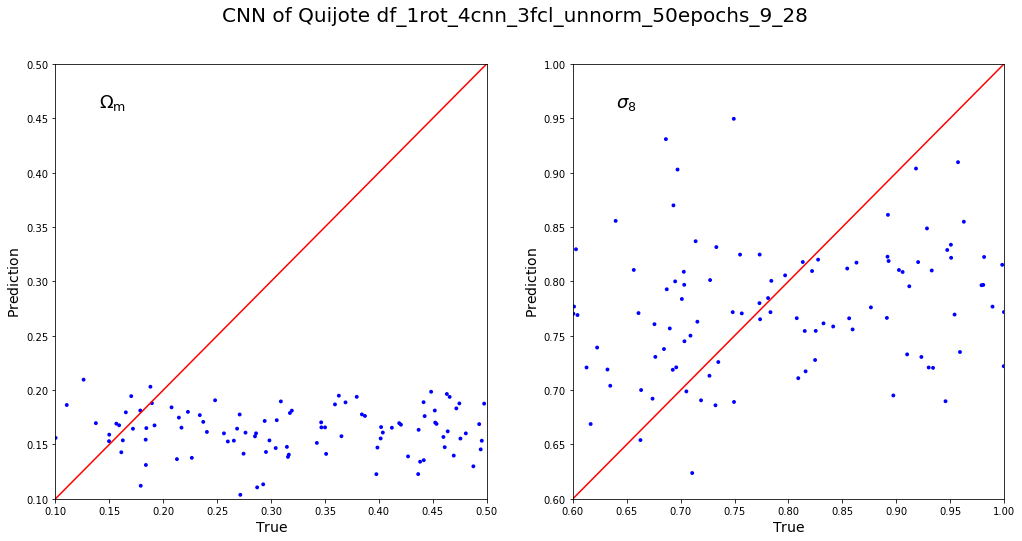

In [7]:
fig = figure()
fig = figure(figsize=(17,8))     #give dimensions to the figure

#gs =  gridspec.GridSpec(2,3height_ratios=[1,1,1],width_ratios[1,1])
gs =  gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
#ax3 = plt.subplot(gs[2])
#ax4 = plt.subplot(gs[3])
#ax5 = plt.subplot(gs[4])
#ax6 = plt.subplot(gs[5])

x_min, x_max = 0.1, 0.5
y_min, y_max = 0.1, 0.5

#param_min = [0.1, 0.03, 0.5, 0.8, 0.6]
#param_max = [0.5, 0.07, 0.9, 1.2, 1.0]

param_min = [0.1, 0.6]
param_max = [0.5, 1.0]

#label = [r"$\Omega_{\rm m}$", r"$\Omega_{\rm b}$", r"$h$",
         #r"$n_{\rm s}$", r"$\sigma_8$"]

label = [r"$\Omega_{\rm m}$", r"$\sigma_8$"]

x_dumb = np.linspace(-15,15,100) #larger values for when outliers are included in plot


#f1 = '../results.txt'
#f_out='../plots/NN_cosmo_params_32.pdf'
#data = np.loadtxt(f1)

for i,ax in enumerate([ax1,ax2]):

    ax.set_xlim([param_min[i],param_max[i]])
    ax.set_ylim([param_min[i],param_max[i]])
    #ax.set_xlim([np.min(true_values[:,i]), np.max(true_values[:,i])]) #for plotting the ouliers
    #ax.set_ylim([1.05*np.min(pred_values[:,i]), 1.05*np.max(pred_values[:,i])]) #for plotting the outliers


    ax.set_xlabel(r'${\rm True}$',fontsize=14)
    ax.set_ylabel(r'${\rm Prediction}$',fontsize=14)

    p1=ax.scatter(true_values[:,i], pred_values[:,i],c='b',edgecolor='none',s=15,marker='o', )
    ax.plot(x_dumb, x_dumb, linestyle='-', c='r')
    
    posx = param_min[i] + 0.1*(param_max[i] - param_min[i])
    posy = param_min[i] + 0.9*(param_max[i] - param_min[i])
    ax.text(posx, posy, label[i], size=18)
    
    #ax.legend(loc='lower right')

#plt.savefig('RF_NCV_all_present.jpg')

#place a label in the plot
#ax1.text(0.2,0.1, r"$z=4.0$", fontsize=22, color='k')

#legend
#ax1.legend([p1,p2],
#           [r"$z=3$",
#            r"$z=4$"],
#           loc=0,prop={'size':18},ncol=1,frameon=True)
            
            #columnspacing=2,labelspacing=2)




#ax1.set_title(r'$\sum m_\nu=0.0\/{\rm eV}$',position=(0.5,1.02),size=18)
#title('About as simple as it gets, folks')
suptitle('CNN of Quijote df_1rot_4cnn_3fcl_unnorm_50epochs_9_28', fontsize=20)  #for title with several panels
#grid(True)
#show()
savefig('df_plots/1rot_4cnn_3fcl__unnorm9_28.pdf', bbox_inches='tight')
#close(fig)

In [12]:
results_2 = np.loadtxt('predictions/results_df_1rot_4CNN_3fcl_unnorm_150epochs_9_29.txt')

In [13]:
results_2.shape

(100, 4)

In [14]:
true_values2= results_2[:,[0,1]]
pred_values2 = results_2[:, [2,3]]

Text(0.5, 0.98, 'CNN of Quijote df_1rot_4cnn_3fcl_unnorm_150epochs_9_29')

<Figure size 432x288 with 0 Axes>

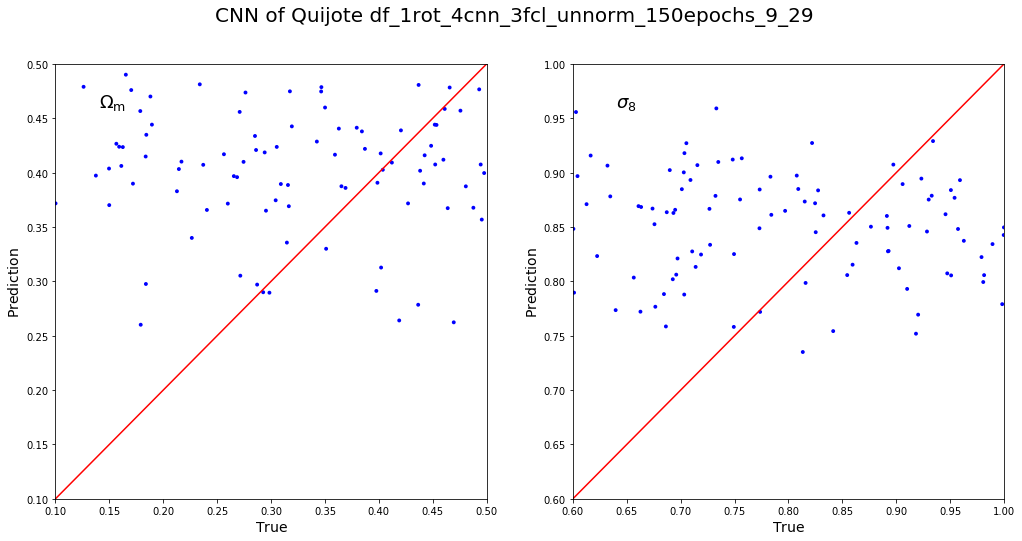

In [15]:
fig = figure()
fig = figure(figsize=(17,8))     #give dimensions to the figure

#gs =  gridspec.GridSpec(2,3height_ratios=[1,1,1],width_ratios[1,1])
gs =  gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
#ax3 = plt.subplot(gs[2])
#ax4 = plt.subplot(gs[3])
#ax5 = plt.subplot(gs[4])
#ax6 = plt.subplot(gs[5])

x_min, x_max = 0.1, 0.5
y_min, y_max = 0.1, 0.5

#param_min = [0.1, 0.03, 0.5, 0.8, 0.6]
#param_max = [0.5, 0.07, 0.9, 1.2, 1.0]

param_min = [0.1, 0.6]
param_max = [0.5, 1.0]

#label = [r"$\Omega_{\rm m}$", r"$\Omega_{\rm b}$", r"$h$",
         #r"$n_{\rm s}$", r"$\sigma_8$"]

label = [r"$\Omega_{\rm m}$", r"$\sigma_8$"]

x_dumb = np.linspace(-15,15,100) #larger values for when outliers are included in plot


#f1 = '../results.txt'
#f_out='../plots/NN_cosmo_params_32.pdf'
#data = np.loadtxt(f1)

for i,ax in enumerate([ax1,ax2]):

    ax.set_xlim([param_min[i],param_max[i]])
    ax.set_ylim([param_min[i],param_max[i]])
    #ax.set_xlim([np.min(true_values[:,i]), np.max(true_values[:,i])]) #for plotting the ouliers
    #ax.set_ylim([1.05*np.min(pred_values[:,i]), 1.05*np.max(pred_values[:,i])]) #for plotting the outliers


    ax.set_xlabel(r'${\rm True}$',fontsize=14)
    ax.set_ylabel(r'${\rm Prediction}$',fontsize=14)

    p1=ax.scatter(true_values2[:,i], pred_values2[:,i],c='b',edgecolor='none',s=15,marker='o', )
    ax.plot(x_dumb, x_dumb, linestyle='-', c='r')
    
    posx = param_min[i] + 0.1*(param_max[i] - param_min[i])
    posy = param_min[i] + 0.9*(param_max[i] - param_min[i])
    ax.text(posx, posy, label[i], size=18)
    
    #ax.legend(loc='lower right')

#plt.savefig('RF_NCV_all_present.jpg')

#place a label in the plot
#ax1.text(0.2,0.1, r"$z=4.0$", fontsize=22, color='k')

#legend
#ax1.legend([p1,p2],
#           [r"$z=3$",
#            r"$z=4$"],
#           loc=0,prop={'size':18},ncol=1,frameon=True)
            
            #columnspacing=2,labelspacing=2)




#ax1.set_title(r'$\sum m_\nu=0.0\/{\rm eV}$',position=(0.5,1.02),size=18)
#title('About as simple as it gets, folks')
suptitle('CNN of Quijote df_1rot_4cnn_3fcl_unnorm_150epochs_9_29', fontsize=20)  #for title with several panels
#grid(True)
#show()
#savefig('df_plots/1rot_4cnn_3fcl__unnorm_150epochs_9_29.pdf', bbox_inches='tight')
#close(fig)